# Team 4 Project

## Fraudulent vs. Non-Fraudulent Job Postings

#### Mahalakshmi Jayapal
#### Yi Wang
#### Jonathan Yoon

In [1]:
import pandas as pd
import numpy as np

In [2]:
dt = pd.read_csv("/Users/yhjnthn/Documents/USD_MS-ADS/ADS502/fake_job_postings.csv")
dt.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
dt.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraudulent', ylabel='count'>

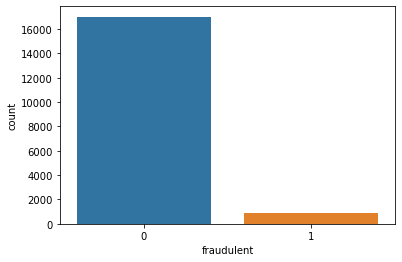

In [6]:
sns.countplot(dt.fraudulent)

In [7]:
import matplotlib.pyplot as plt

In [8]:
crosstab_01 = pd.crosstab(dt['employment_type'], dt['fraudulent'])
crosstab_01

fraudulent,0,1
employment_type,,
Contract,1480,44
Full-time,11130,490
Other,212,15
Part-time,723,74
Temporary,239,2


<AxesSubplot:xlabel='employment_type'>

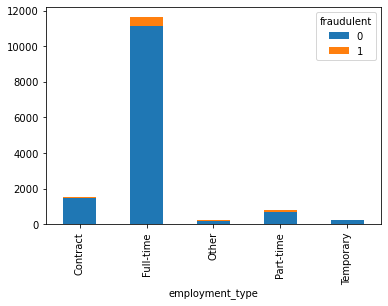

In [9]:
crosstab_01.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='employment_type'>

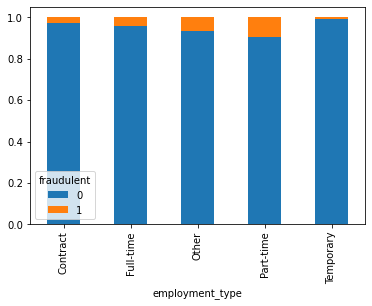

In [10]:
crosstab_norm = crosstab_01.div(crosstab_01.sum(axis=1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

In [11]:
dt.location = dt.location.fillna('blank')

In [12]:
loc_split = []
for loc in dt.location:
    loc_split.append(loc.split(','))

In [13]:
loc_split = pd.DataFrame(loc_split)

In [14]:
loc_split = loc_split[[1, 2]]

In [15]:
loc_split = loc_split.rename(columns={1: "State", 2: "City"})

In [16]:
dt.employment_type = dt.employment_type.fillna('Other')

In [17]:
dt.required_experience = dt.required_experience.fillna('Unspecified')

In [18]:
dt.required_education = dt.required_education.fillna('Not Applicable')

In [19]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      17880 non-null  object
 13  required_experience  17880 non-null  object
 14  required_education   17880 non-null  object
 15  industry             12977 non-null  object
 16  func

In [20]:
dt.isnull().sum()

job_id                     0
title                      0
location                   0
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type            0
required_experience        0
required_education         0
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [21]:
dt.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,Not Applicable,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Not Applicable,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,Other,Unspecified,Not Applicable,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,Other,Unspecified,Not Applicable,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,Other,Unspecified,Not Applicable,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,Not Applicable,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


<AxesSubplot:xlabel='employment_type', ylabel='count'>

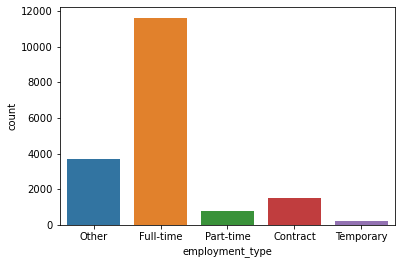

In [22]:
sns.countplot(x = dt['employment_type'], data=dt)

In [23]:
crosstab_02 = pd.crosstab(dt['employment_type'], dt['fraudulent'])
crosstab_02

fraudulent,0,1
employment_type,,
Contract,1480,44
Full-time,11130,490
Other,3442,256
Part-time,723,74
Temporary,239,2


<AxesSubplot:xlabel='employment_type'>

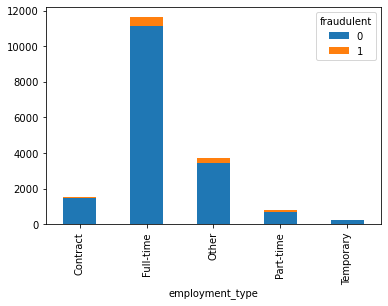

In [24]:
crosstab_02.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='employment_type'>

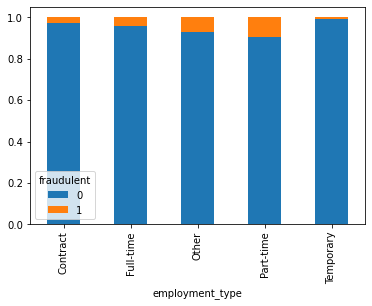

In [25]:
crosstab_norm2 = crosstab_02.div(crosstab_02.sum(axis=1), axis = 0)
crosstab_norm2.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='required_experience'>

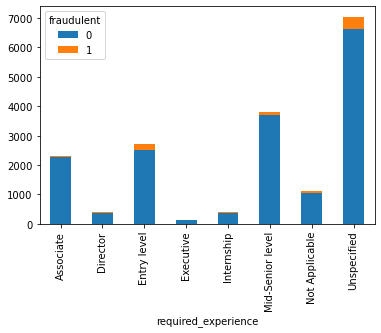

In [26]:
crosstab_03 = pd.crosstab(dt['required_experience'], dt['fraudulent'])
crosstab_03.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='required_experience'>

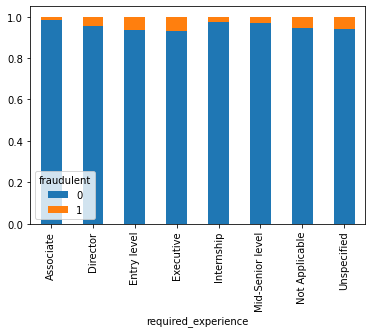

In [27]:
crosstab_norm3 = crosstab_03.div(crosstab_03.sum(axis=1), axis = 0)
crosstab_norm3.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='required_education'>

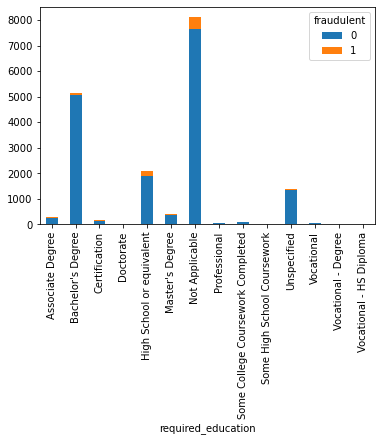

In [28]:
crosstab_04 = pd.crosstab(dt['required_education'], dt['fraudulent'])
crosstab_04.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='required_education'>

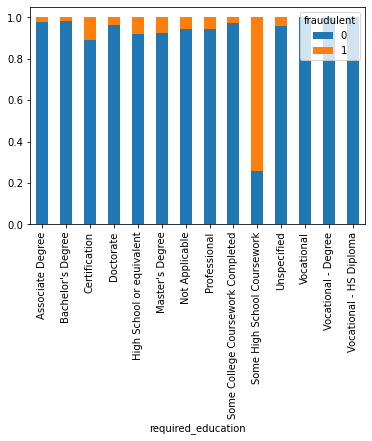

In [29]:
crosstab_norm4 = crosstab_04.div(crosstab_04.sum(axis=1), axis = 0)
crosstab_norm4.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='has_company_logo'>

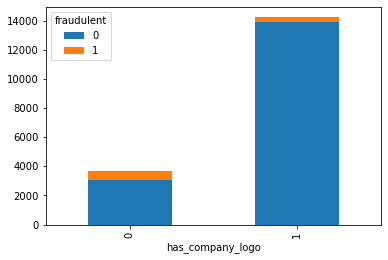

In [30]:
crosstab_05 = pd.crosstab(dt['has_company_logo'], dt['fraudulent'])
crosstab_05.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='has_company_logo'>

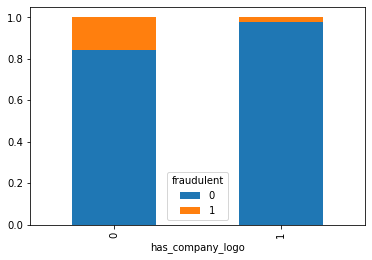

In [31]:
crosstab_norm5 = crosstab_05.div(crosstab_05.sum(axis=1), axis = 0)
crosstab_norm5.plot(kind='bar', stacked = True)